In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [43]:
df_aapl = quandl.get('WIKI/AAPL',start_date = start, end_date = end)
df_cisco = quandl.get('WIKI/CSCO',start_date = start, end_date = end)
df_ibm = quandl.get('WIKI/IBM',start_date = start, end_date = end)
df_amzn = quandl.get('WIKI/AMZN',start_date = start, end_date = end)

In [44]:
df_aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,10793600.0,0.0,1.0,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,410.0000,414.68,409.28,413.44,9286500.0,0.0,1.0,52.690714,53.292160,52.598184,53.132802,65005500.0
2012-01-05,414.9500,418.55,412.67,418.03,9688200.0,0.0,1.0,53.326858,53.789509,53.033847,53.722681,67817400.0
2012-01-06,419.7700,422.75,419.22,422.40,11367600.0,0.0,1.0,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-09,425.5001,427.75,421.35,421.73,14072300.0,0.0,1.0,54.682693,54.971837,54.149348,54.198183,98506100.0


In [45]:
df_aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0
2016-12-29,116.45,117.1095,116.40,116.73,15039519.0,0.0,1.0,115.011672,115.663027,114.962290,115.288214,15039519.0
2016-12-30,116.65,117.2000,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,114.389454,30586265.0


In [82]:
aapl = pd.DataFrame(df_aapl['Adj. Close'])
cisco = pd.DataFrame(df_cisco['Adj. Close'])
ibm = pd.DataFrame(df_ibm['Adj. Close'])
amzn = pd.DataFrame(df_amzn['Adj. Close'])

In [84]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [87]:
amzn.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,179.03,1.000000
2012-01-04,177.51,0.991510
2012-01-05,177.61,0.992068
2012-01-06,182.61,1.019997
2012-01-09,178.56,0.997375


In [90]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [91]:
#30% in appl
#20% in cisco
#40% in amzon
#10% in ibm

In [97]:
for stock_df, allo in zip((aapl, cisco, amzn, ibm),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [98]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [99]:
for stock_df in (aapl, cisco, amzn, ibm):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [100]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [101]:
all_post_vals = [aapl['Position Values'],cisco['Position Values'],amzn['Position Values'],ibm['Position Values']]

In [105]:
portfolio_val = pd.concat(all_post_vals, axis = 1)

In [108]:
portfolio_val.columns = ["AAPL Pos", "CISCO Pos","AMZN Pos", "IBM Pos"]
portfolio_val.head()

,AAPL Pos,CISCO Pos,AMZN Pos,IBM Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,396603.921131,99592.055824
2012-01-05,304960.727573,203113.258186,396827.347372,99119.699410
2012-01-06,308148.724558,202361.782072,407998.659443,97981.749866
2012-01-09,307659.946988,203650.026838,398949.896665,97471.819646


In [109]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [110]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,AMZN Pos,IBM Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,396603.921131,99592.055824,1.001673e+06
2012-01-05,304960.727573,203113.258186,396827.347372,99119.699410,1.004021e+06
2012-01-06,308148.724558,202361.782072,407998.659443,97981.749866,1.016491e+06
2012-01-09,307659.946988,203650.026838,398949.896665,97471.819646,1.007732e+06


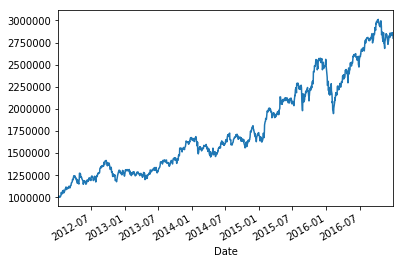

In [111]:
portfolio_val['Total Pos'].plot()

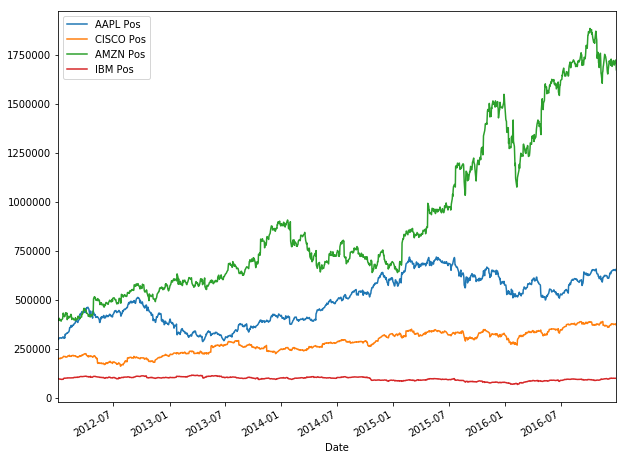

In [114]:
portfolio_val.drop('Total Pos',axis =1).plot(figsize=(10,8));

In [116]:
 portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [117]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,AMZN Pos,IBM Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,396603.921131,99592.055824,1.001673e+06,0.001673
2012-01-05,304960.727573,203113.258186,396827.347372,99119.699410,1.004021e+06,0.002344
2012-01-06,308148.724558,202361.782072,407998.659443,97981.749866,1.016491e+06,0.012420
2012-01-09,307659.946988,203650.026838,398949.896665,97471.819646,1.007732e+06,-0.008617


In [121]:
#Avg daily return
portfolio_val['Daily Return'].mean()

0.000902357907176961

In [122]:
portfolio_val['Daily Return'].std()

0.012896893878458078

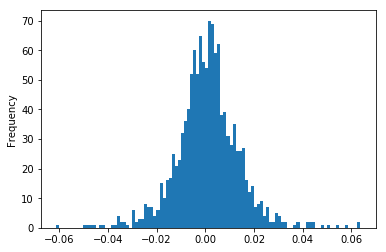

In [123]:
portfolio_val['Daily Return'].plot(kind ='hist',bins = 100)

In [124]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [125]:
cumulative_return

179.97828220000912

In [127]:
portfolio_val['Total Pos'][-1]

2799782.822000091

In [128]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [129]:
SR

0.069967072357181

In [130]:
AR = SR * (252**.5)

In [131]:
AR

1.1106928405221763

In [132]:
#Monte Carlo simulation

In [133]:
#Concatenate close prices for the 4 stocks
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_close', index_col='Date',parse_dates=True)

In [136]:
stocks = pd.concat([aapl, cisco, ibm, amzn],axis = 1)

In [138]:
stocks.columns = ['aapl','cisco','ibm','amzn']

In [139]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [141]:
#mean daily return
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [143]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [147]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


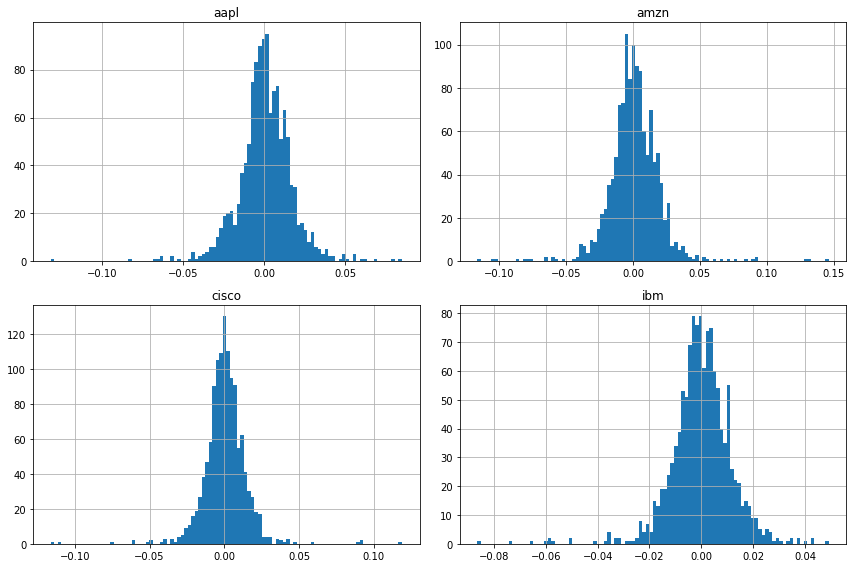

In [148]:
log_ret.hist(bins = 100, figsize=(12,8))
plt.tight_layout()

In [149]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [175]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[ind,:] = weights
    
    # Expected Return
    #exp portfolio return / volatility
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)

    # Exp volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))

    # Sharpe ratio
    sharpe_arr[ind] = exp_ret[ind]/exp_vol[ind]

TypeError: 'float' object is not subscriptable